In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
# Load the dataset
data = pd.read_csv('car data.csv')

## Exploratory Data Analysis (EDA)

In [26]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [27]:
# Display the first 10 rows of the dataset
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [28]:
# Display the last 10 rows of the dataset
data.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [29]:
# Display summary statistics
print(data.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [30]:
# To check if there are any outliers
# Here we conclude that we don't have any outliers.
data.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
90%,2017.000000,9.500000,14.790000,65000.000000,0.000000
95%,2017.000000,14.500000,22.780000,80000.000000,0.000000
99%,2017.000000,23.000000,35.960000,142000.000000,1.000000


## Data Visualization

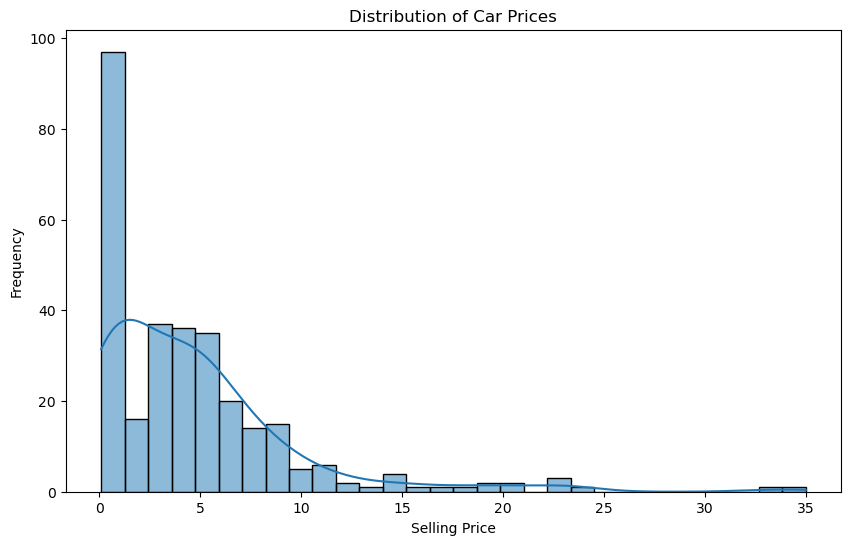

In [31]:
# Visualize the distribution of the target variable (car prices)
plt.figure(figsize=(10, 6))
sns.histplot(data['Selling_Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

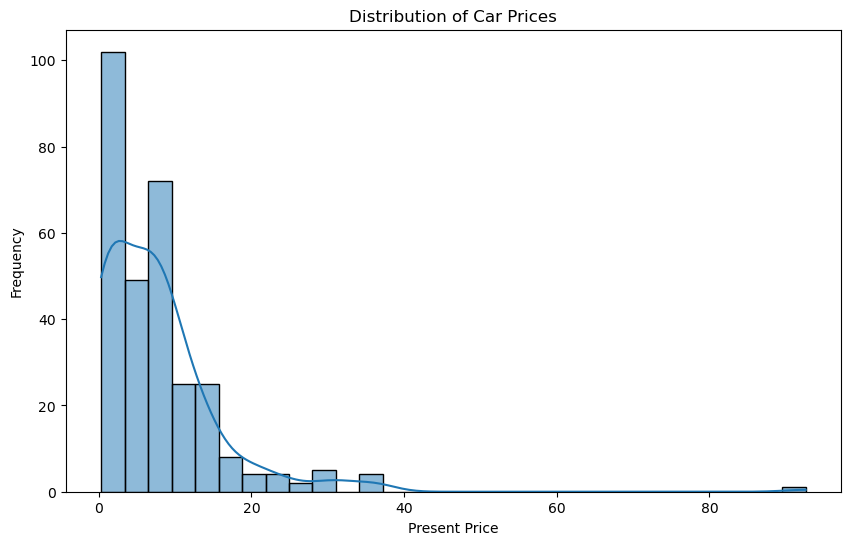

In [32]:
# Visualize the distribution of the target variable (car prices)
plt.figure(figsize=(10, 6))
sns.histplot(data['Present_Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Present Price')
plt.ylabel('Frequency')
plt.show()

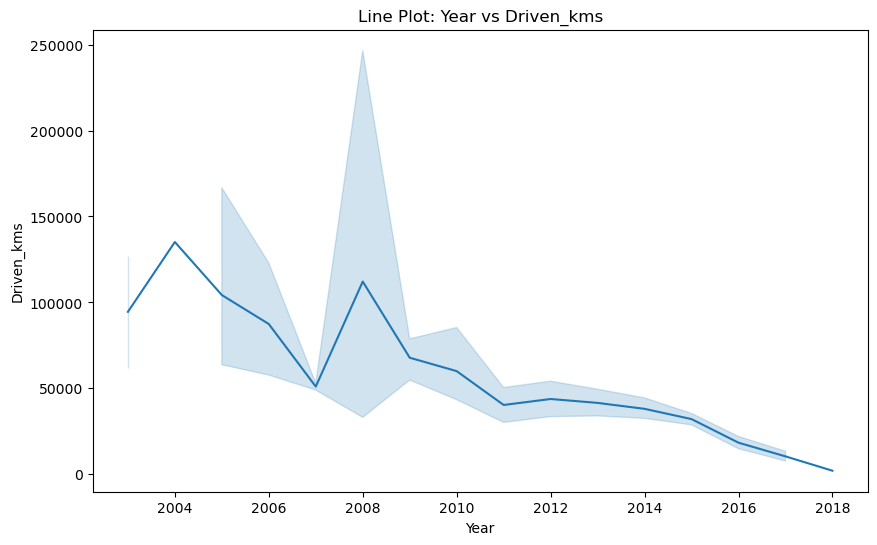

In [33]:
# Line plot for comapring the mmodel and kms driven by it.
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Driven_kms', data=data)
plt.title('Line Plot: Year vs Driven_kms')
plt.xlabel('Year')
plt.ylabel('Driven_kms')
plt.show()

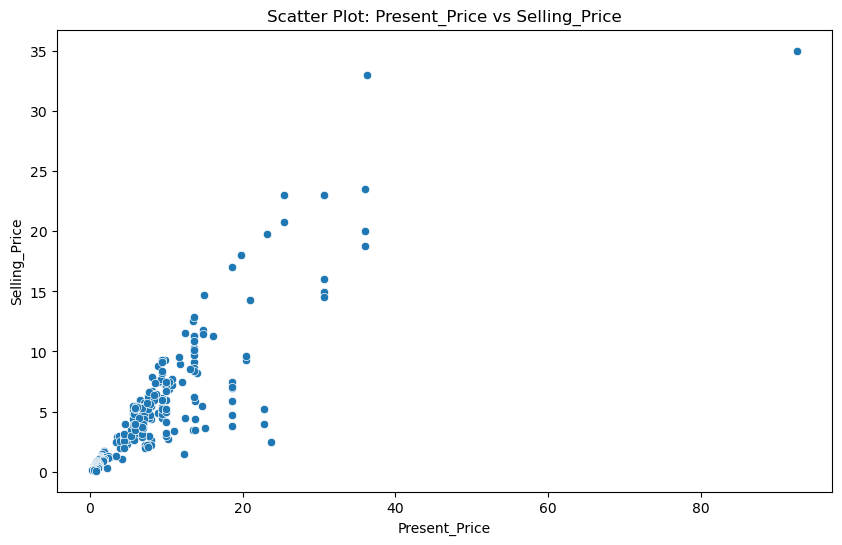

In [34]:
# Scatter plot for comparing the prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data)
plt.title('Scatter Plot: Present_Price vs Selling_Price')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.show()

In [35]:
# Display the Most Selling Car 
data.Car_Name.value_counts()[0:10]

city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
Name: Car_Name, dtype: int64

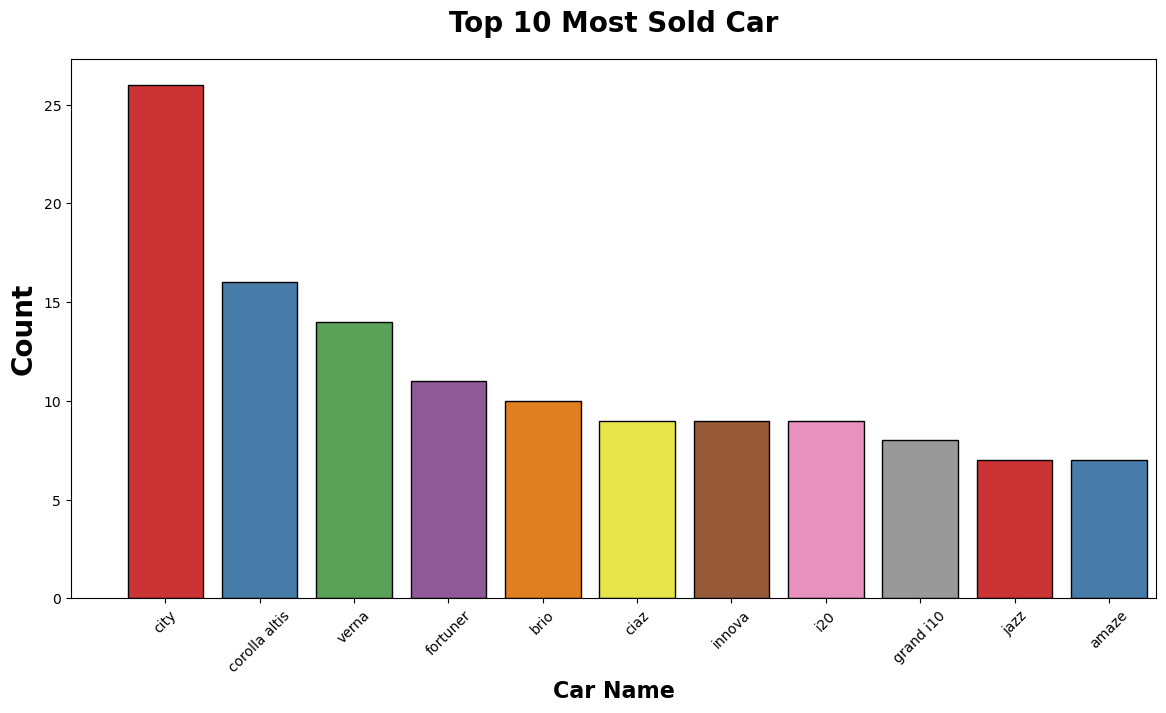

In [36]:
# Plotting the graph for distribution of most selling cars
plt.subplots(figsize=(14, 7))
sns.countplot(x="Car_Name", data=data, ec="black", palette="Set1", order=data['Car_Name'].value_counts().index)
plt.title("Top 10 Most Sold Car", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Car Name", weight="bold", fontsize=16)
plt.xticks(rotation=45)
plt.xlim(-1, 10.5)
plt.show()

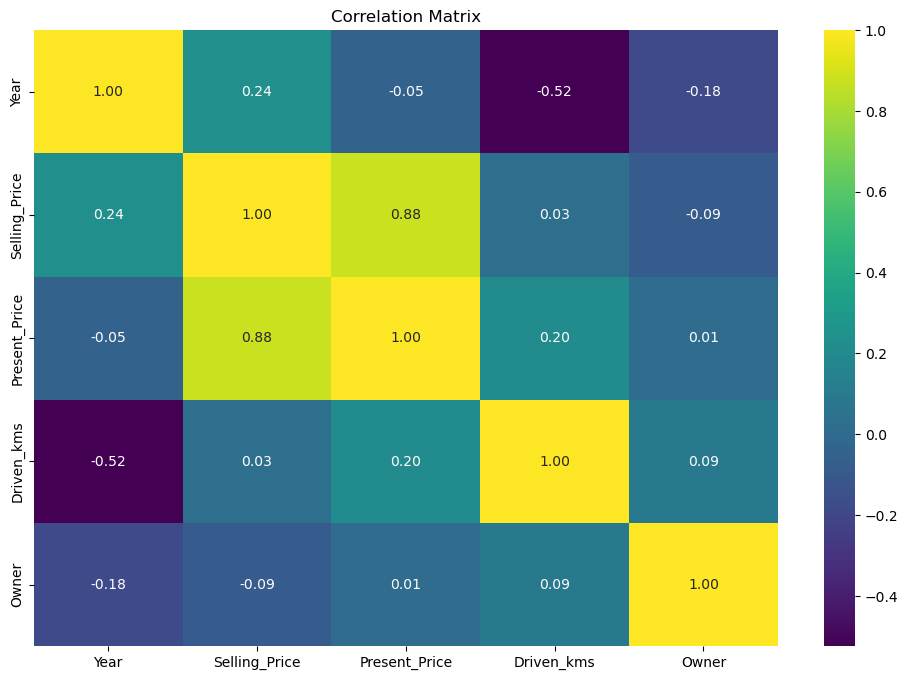

In [37]:
# Visualize the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

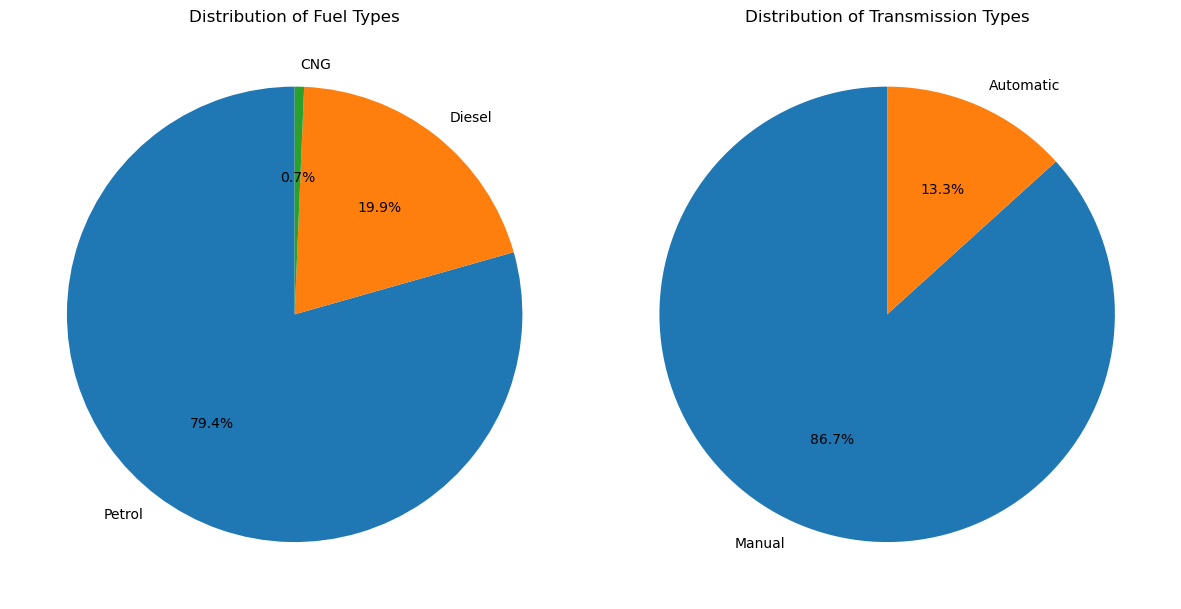

In [38]:
# Assuming 'Fuel_Type' and 'Transmission' are columns in your dataset
fuel_type_counts = data['Fuel_Type'].value_counts()
transmission_counts = data['Transmission'].value_counts()

# Plotting the pie chart for Fuel Type Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fuel Types')

# Plotting the pie chart for Transmission Type Distribution
plt.subplot(1, 2, 2)
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Transmission Types')

plt.tight_layout()
plt.show()


## Model Develpoment

In [40]:
# Separate features and target variable
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
# Define your bin edges
price_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50']
y_train_class = pd.cut(y_train, bins=price_bins, labels=labels)
y_test_class = pd.cut(y_test, bins=price_bins, labels=labels)

In [43]:
# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Random Forest 

In [44]:

# Random Forest Model
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', RandomForestRegressor(random_state=42))])

rf_pipeline.fit(X_train, y_train)
rf_predictions = rf_pipeline.predict(X_test)

# Evaluate Random Forest Model
print("Random Forest Model Metrics:")
print('Predictions are : {}\n'.format(rf_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, rf_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, rf_predictions))
print("R-squared:", r2_score(y_test, rf_predictions))


# Random Forest Classification Metrics
rf_class_predictions = rf_pipeline.predict(X_test)
rf_class_predictions = pd.cut(rf_class_predictions, bins=price_bins, labels=labels)
print("\nRandom Forest Classification Metrics:")
print("Accuracy:", accuracy_score(y_test_class, rf_class_predictions))
print("Precision:", precision_score(y_test_class, rf_class_predictions, average='weighted'))
print("Recall:", recall_score(y_test_class, rf_class_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test_class, rf_class_predictions, average='weighted'))

Random Forest Model Metrics:
Predictions are : [ 0.4297 10.527   5.047   0.2091  7.6764  6.797   1.127   0.5817  0.459
  6.665   7.8172  1.1092  8.2448  0.4557  5.329   2.614   1.1236 14.4794
  0.4634  1.5775  0.3273  7.7253  4.813   2.7345  0.507   3.485   5.332
  3.143   1.1802  1.1721  0.4007  8.8494  0.4607  2.5769  7.941   4.019
  6.6741  5.8834  2.528   6.4312  4.9058  3.6519  4.7475  0.5629  6.23
  0.7206  8.082   6.879   2.944   3.6485  5.027   1.5361 23.0599 20.7161
  6.546  10.3442  5.16    8.7344  2.9304  6.5905  0.2236]

Mean Absolute Error: 0.5954803278688526
Mean Squared Error: 0.7710541483606554
R-squared: 0.9665276933745053

Random Forest Classification Metrics:
Accuracy: 0.9016393442622951
Precision: 0.8982057800765613
Recall: 0.9016393442622951
F1 Score: 0.8963490660073999


C:\Users\HP LIFE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradient Boosting

In [45]:
# XGBoost Model
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', XGBRegressor(random_state=42))])

xgb_pipeline.fit(X_train, y_train)
xgb_predictions = xgb_pipeline.predict(X_test)

# Evaluate XGBoost Model
print("\nXGBoost Model Metrics:")
print('Predictions are : {}\n'.format(xgb_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, xgb_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, xgb_predictions))
print("R-squared:", r2_score(y_test, xgb_predictions))


# XGBoost Classification Metrics
xgb_class_predictions = xgb_pipeline.predict(X_test)
xgb_class_predictions = pd.cut(xgb_class_predictions, bins=price_bins, labels=labels)
print("\nXGBoost Classification Metrics:")
print("Accuracy:", accuracy_score(y_test_class, xgb_class_predictions))
print("Precision:", precision_score(y_test_class, xgb_class_predictions, average='weighted'))
print("Recall:", recall_score(y_test_class, xgb_class_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test_class, xgb_class_predictions, average='weighted'))


XGBoost Model Metrics:
Predictions are : [ 0.3380916   9.992892    5.0520105   0.27657112  7.2987475   6.7281384
  1.0667961   0.5683983   0.45186514  7.0702744   7.6237297   0.99036944
  8.699688    0.5251953   5.65864     2.4115038   1.0873157  14.372331
  0.4769126   1.6141335   0.3328408   8.604627    4.7212186   2.7803385
  0.48221228  3.9213479   5.2717543   2.8593428   1.1276591   1.2016194
  0.5051678   9.230411    0.45997208  2.5393012   7.7550488   4.0433197
  6.2697988   4.3943276   2.4850602   6.03576     3.3402197   3.361492
  5.0800953   0.5892604   6.4362698   0.71256965  8.544328    6.8106065
  2.9548538   4.318084    4.8981447   1.331378   20.51537    22.850445
  4.973137    9.13694     5.200062    8.350938    2.6898904   6.7738414
  0.26893812]

Mean Absolute Error: 0.6007286828658619
Mean Squared Error: 0.9383166066375066
R-squared: 0.9592666465306745

XGBoost Classification Metrics:
Accuracy: 0.8360655737704918
Precision: 0.8153253849975162
Recall: 0.83606557377049

C:\Users\HP LIFE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [46]:
# Decision Tree Model
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', DecisionTreeRegressor(random_state=42))])

dt_pipeline.fit(X_train, y_train)
dt_predictions = dt_pipeline.predict(X_test)

# Evaluate Decision Tree Model
print("Decision Tree Model Metrics:")
print('Predictions are : {}'.format(dt_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, dt_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, dt_predictions))
print("R-squared:", r2_score(y_test, dt_predictions))

# Decision Tree Classification Metrics
dt_class_predictions = dt_pipeline.predict(X_test)
dt_class_predictions = pd.cut(dt_class_predictions, bins=price_bins, labels=labels)
print("\nDecision Tree Classification Metrics:")
print("Accuracy:", accuracy_score(y_test_class, dt_class_predictions))
print("Precision:", precision_score(y_test_class, dt_class_predictions, average='weighted'))
print("Recall:", recall_score(y_test_class, dt_class_predictions, average='weighted'))
print("F1 Score:", f1_score(y_test_class, dt_class_predictions, average='weighted'))


Decision Tree Model Metrics:
Predictions are : [ 0.5  11.5   4.4   0.16  7.05  5.95  1.11  0.5   0.5   7.25  7.25  1.25
  7.5   0.45  5.95  2.55  1.25 14.25  0.5   1.65  0.25  8.75  4.5   2.35
  0.45  3.1   5.25  2.9   1.15  1.15  0.25  8.55  0.45  2.25  7.75  3.9
  5.85  7.45  2.55  7.05  3.49  2.25  5.8   0.6   6.45  0.65  8.5   4.35
  3.1   3.1   5.25  1.45 23.   20.75  5.95  9.15  5.25  7.75  3.25  6.4
  0.25]
Mean Absolute Error: 0.6498360655737704
Mean Squared Error: 1.0999836065573771
R-squared: 0.9522485046737803

Decision Tree Classification Metrics:
Accuracy: 0.8688524590163934
Precision: 0.8617628273365978
Recall: 0.8688524590163934
F1 Score: 0.8634879381580702


C:\Users\HP LIFE\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
